In [30]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [31]:
path = kagglehub.dataset_download("noordeen/insurance-premium-prediction")

print("Path to dataset files:", path)
print("Path to dataset files:", path)
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    print("No CSV file found in the directory.")
else:
    print(f"Found CSV file: {csv_file}")


Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\noordeen\insurance-premium-prediction\versions\1
Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\noordeen\insurance-premium-prediction\versions\1
Found CSV file: C:\Users\keert\.cache\kagglehub\datasets\noordeen\insurance-premium-prediction\versions\1\insurance.csv


In [32]:
df = pd.read_csv(csv_file, delimiter=',')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [33]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

print(df.info())

Number of rows: 1338
Number of columns: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [34]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

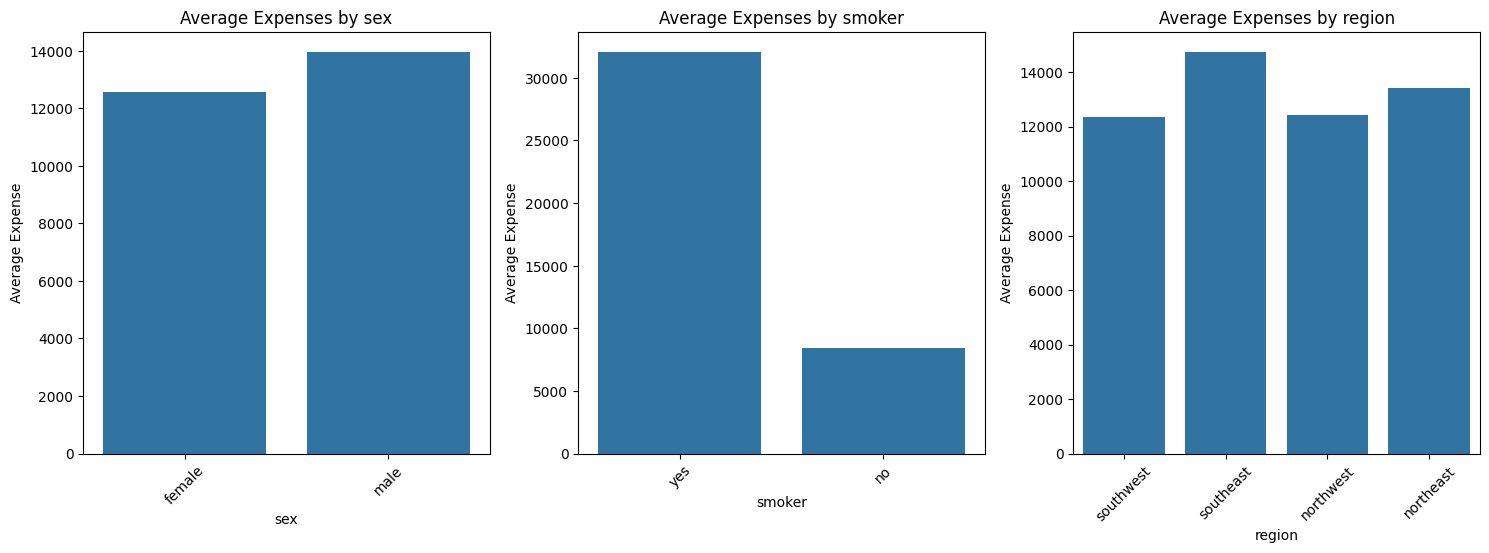

In [35]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot(2, 3, i + 1)  
    sns.barplot(x=column, y='expenses', data=df, errorbar=None) 
    plt.title(f'Average Expenses by {column}')
    plt.xlabel(column)
    plt.ylabel('Average Expense')
    plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [36]:
X_df=df.drop('expenses',axis=1)
Y_df=df['expenses']

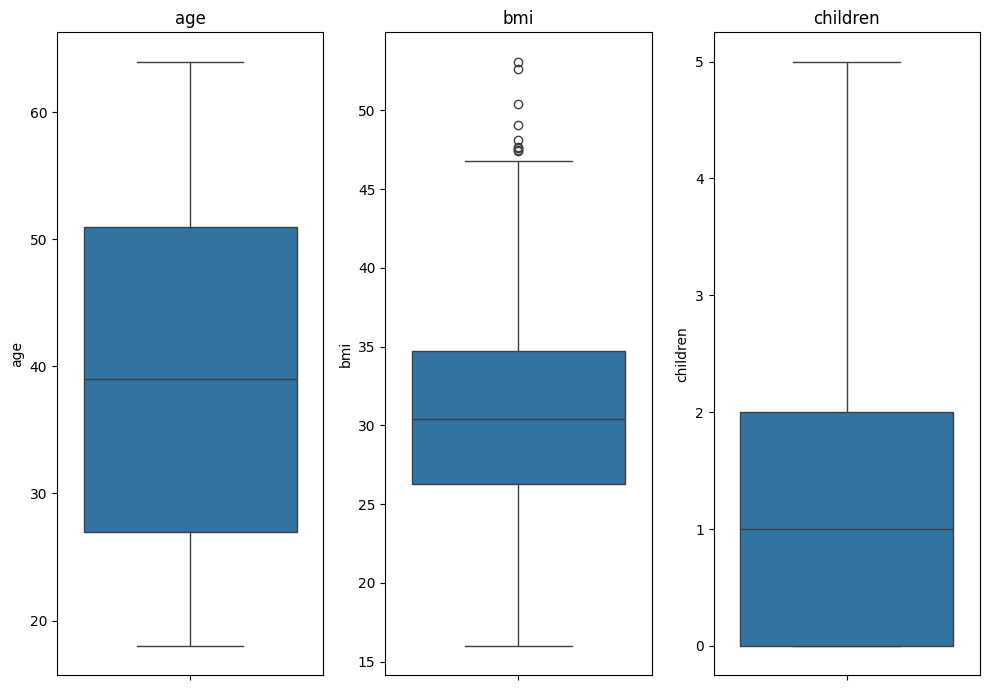

In [37]:
# Set the figure size
plt.figure(figsize=(10,7))

# Create box plots for each feature
for i, column in enumerate(X_df.select_dtypes(exclude=['object']).columns):
    plt.subplot(1, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=X_df[column])
    plt.title(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [38]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply get_dummies to all categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int64
 1   bmi               1338 non-null   int64
 2   children          1338 non-null   int64
 3   expenses          1338 non-null   int64
 4   sex_male          1338 non-null   int64
 5   smoker_yes        1338 non-null   int64
 6   region_northwest  1338 non-null   int64
 7   region_southeast  1338 non-null   int64
 8   region_southwest  1338 non-null   int64
dtypes: int64(9)
memory usage: 94.2 KB


In [39]:
# Prepare the features (X) and target (y)
X = df.drop('expenses', axis=1)  # Drop non-numeric and target columns
y = df['expenses']
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply Standardization to the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy (R² score) and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
df_comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})

# Print the DataFrame
print(df_comparison)

R² Score: 0.7840717963524979
Mean Squared Error: 33522526.813324735
     Actual     Predicted
0      9095   9070.046744
1      5272   7214.434699
2     29330  36719.860532
3      9301   9372.843822
4     33750  26812.633160
..      ...           ...
263   47055  39169.824142
264   12222  11863.118639
265    6067   7831.318648
266   63770  40895.596289
267    9872  12401.864445

[268 rows x 2 columns]


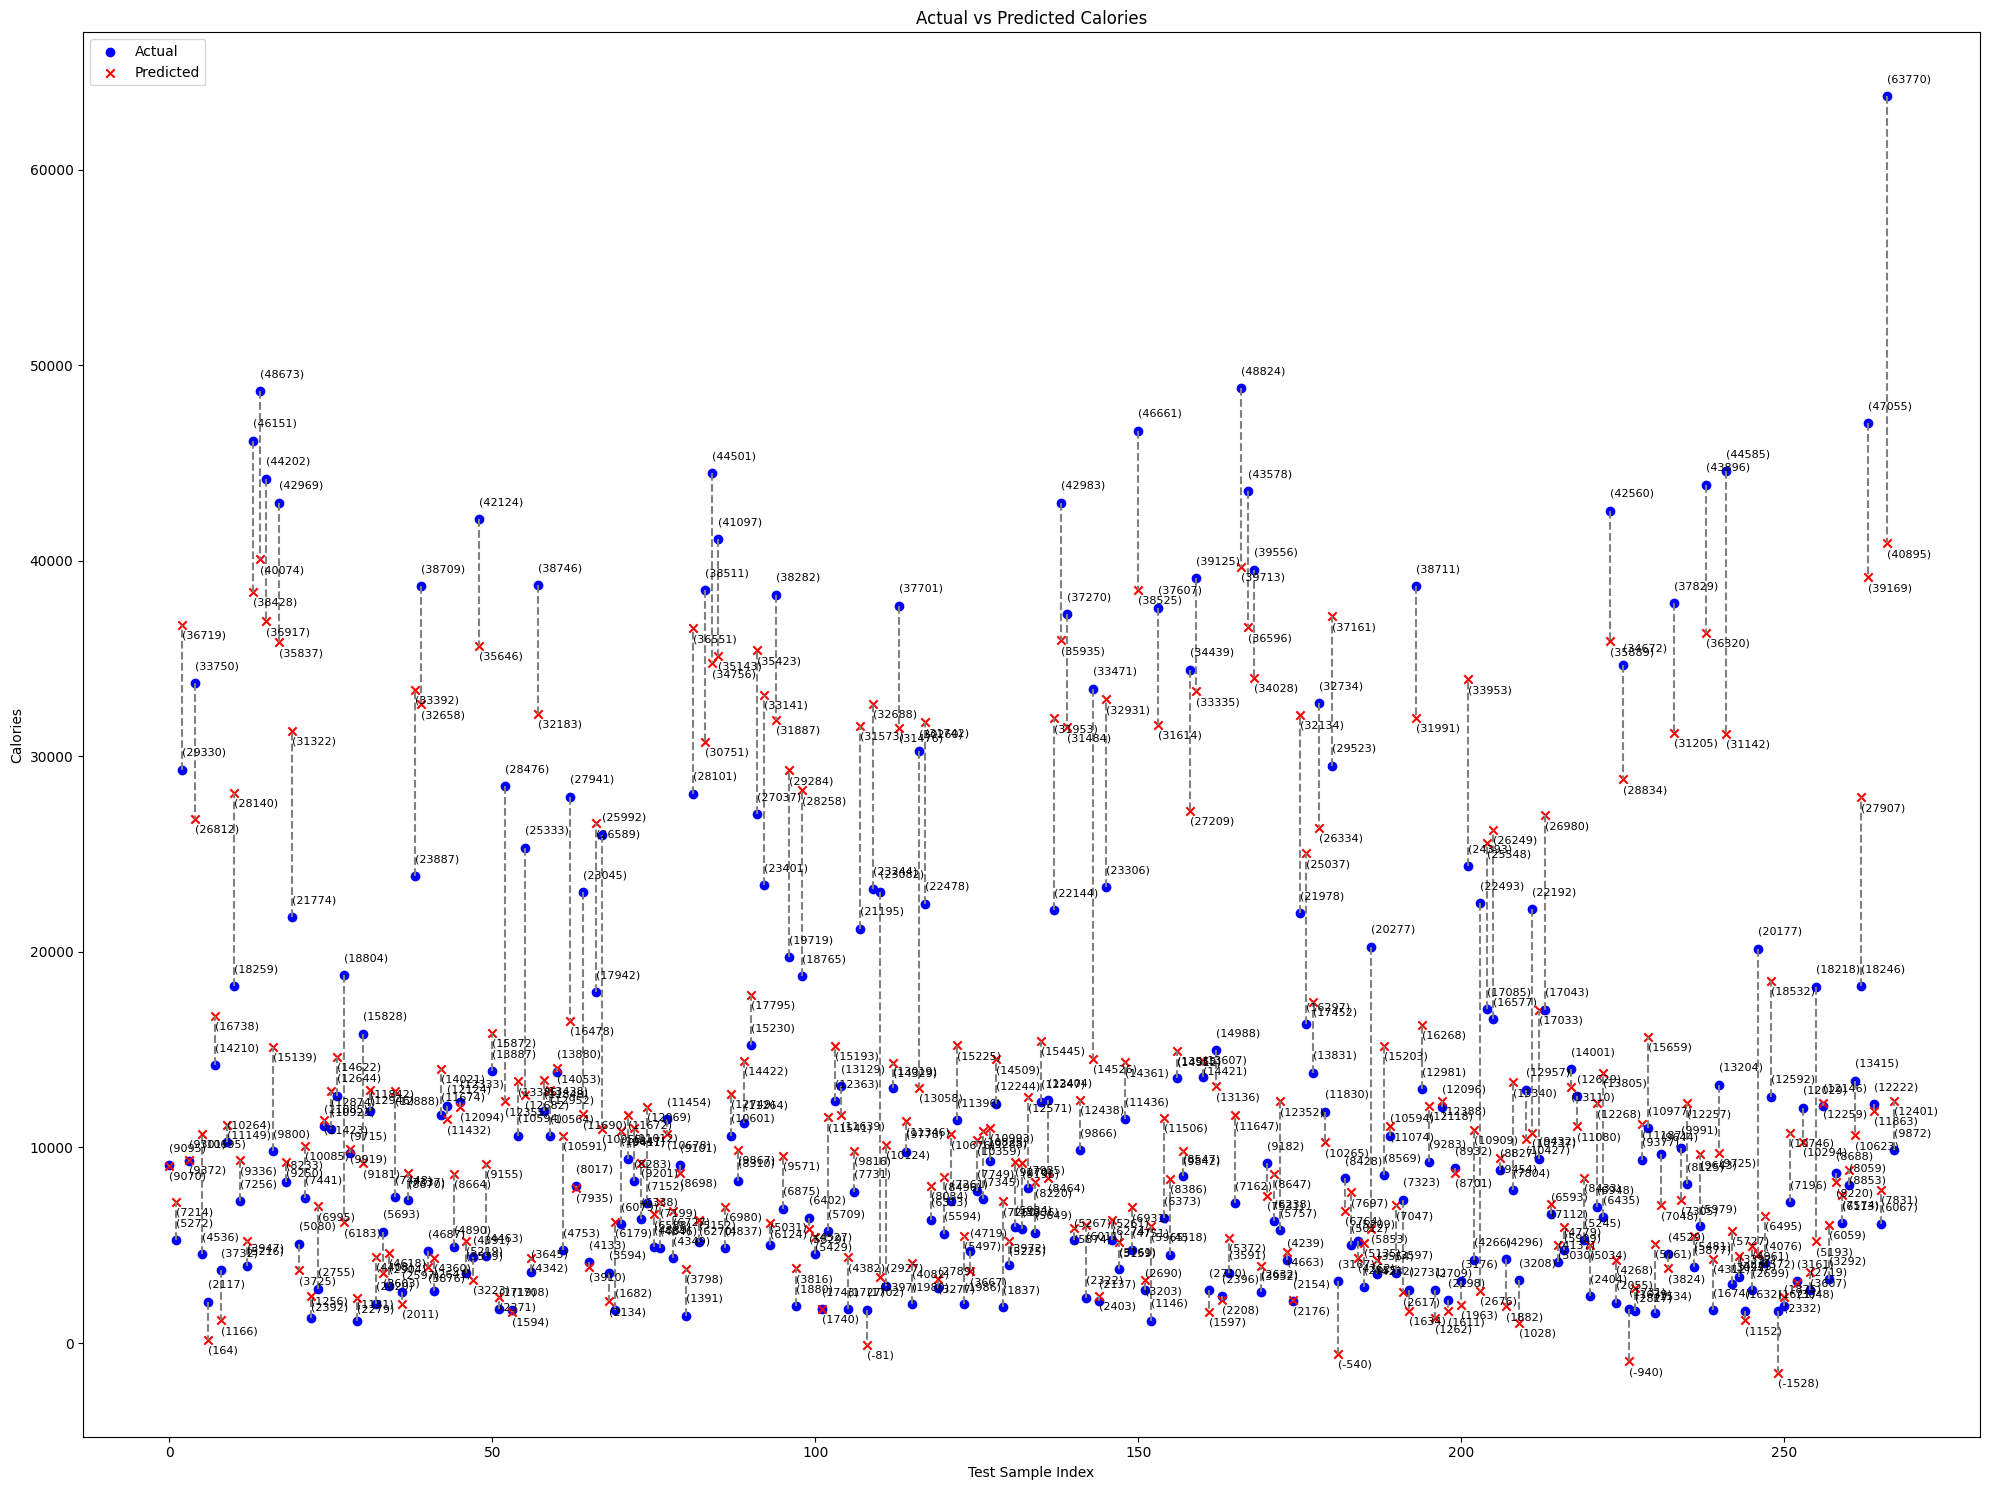

In [41]:
plt.figure(figsize=(20, 15))

for i, (actual, predicted) in enumerate(zip(y_test.values, y_pred)):
    plt.scatter(i, actual, color='b', marker='o', label='Actual' if i == 0 else '')
    plt.scatter(i, predicted, color='r', marker='x', label='Predicted' if i == 0 else '')
    plt.plot([i, i], [actual, predicted], linestyle='--', color='gray')  # Add dashed line

    # Annotate data points with values
    plt.annotate(f"({int(actual)})", xy=(i, actual), textcoords="offset points", xytext=(0, 10), fontsize=8)
    plt.annotate(f"({int(predicted)})", xy=(i, predicted), textcoords="offset points", xytext=(0, -10), fontsize=8)

plt.title('Actual vs Predicted Calories')
plt.xlabel('Test Sample Index')
plt.ylabel('Calories')
plt.legend()
plt.tight_layout()
plt.show()

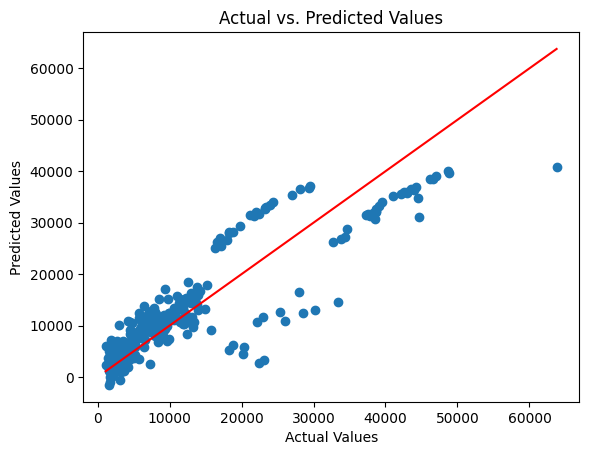

In [42]:
# Create a scatter plot
plt.scatter(y_test, y_pred)

# Add a 45-degree line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Show the plot
plt.show()

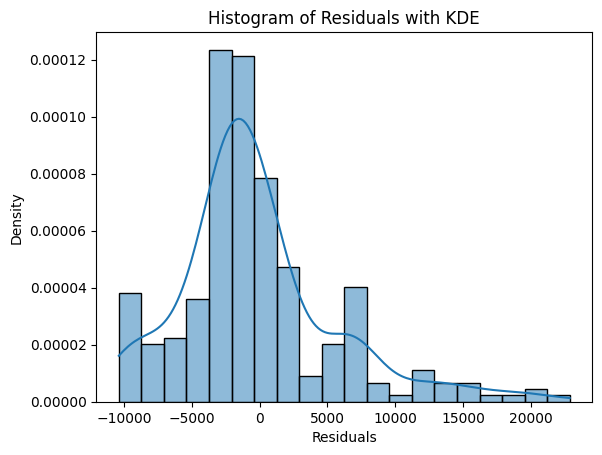

In [43]:
residuals = y_test - y_pred

# Create the plot
sns.histplot(residuals, kde=True, stat='density', bins=20)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Histogram of Residuals with KDE")
plt.show()